In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
train_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [4]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
# train_df = train_df.drop(['Ticket'], axis=1)
# test_df = test_df.drop(['Ticket'], axis=1)

# combine = [train_df, test_df]

# Title

In [6]:
def extract_title(s) :
    return s.split(', ')[1].split('. ')[0]

for dataset in combine :
    dataset['Title'] = dataset['Name'].apply(extract_title)

train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [7]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
# train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by = 'Survived')
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [8]:
title_set = {'Mr' : 1, 'Rare':2, 'Master':3, 'Miss':4, 'Mrs':5}

for dataset in combine :
    dataset['Title'] = dataset['Title'].apply(lambda x : title_set[x])
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,5
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,5
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [9]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 11))

In [10]:
sex_map = {'female' : 1, 'male' : 0}

for dataset in combine :
    dataset['Sex'] = dataset['Sex'].apply(lambda x: sex_map[x])

train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1,5
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4
3,1,1,35.0,1,0,113803,53.1000,C123,S,1,5
4,3,0,35.0,0,0,373450,8.0500,NaN,S,0,1


# Age

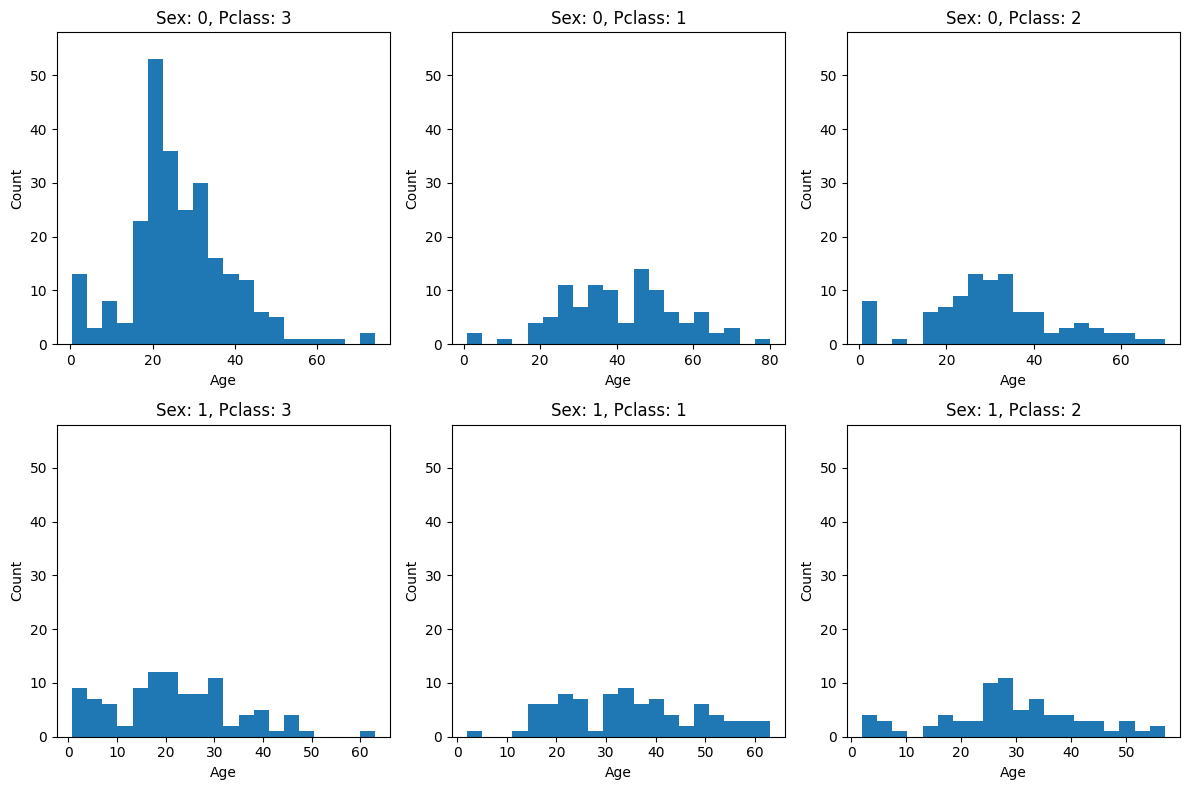

In [11]:
sex = train_df['Sex'].unique()
p_class = train_df['Pclass'].unique()

fig, ax = plt.subplots(len(sex), len(p_class), figsize = (12,8))
max_count = 0

for i in range(len(sex)) :
    for j in range(len(p_class)) :
        subset = train_df.loc[train_df['Sex'] == sex[i]].loc[train_df['Pclass'] == p_class[j]]
        counts , bins, _ = ax[i, j].hist(subset['Age'], bins = 20)
        max_count = max(max_count, max(counts))
        ax[i, j].set_title(f'Sex: {sex[i]}, Pclass: {p_class[j]}')
        ax[i, j].set_xlabel('Age')
        ax[i, j].set_ylabel('Count')

for i in ax.flat:
    i.set_ylim(0, max_count+5)

plt.tight_layout()
plt.show()

In [12]:
avg_age = np.zeros([2,3])
avg_age

array([[0., 0., 0.],
       [0., 0., 0.]])

In [13]:
for dataset in combine :
    for i in range(len(sex)) :
        for j in range(len(p_class)) :
            subset = dataset.loc[(dataset.Sex == sex[i]) & (dataset.Pclass == p_class[j])]['Age'].dropna()
            median_age = subset.median()
            avg_age[i,j] = median_age

    for i in range(len(sex)) :
        for j in range(len(p_class)) :
            dataset.loc[(dataset.Sex == sex[i]) & (dataset.Pclass == p_class[j]) & (dataset.Age.isnull()), 'Age'] = avg_age[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,38,1,0,PC 17599,71.2833,C85,C,1,5
2,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4
3,1,1,35,1,0,113803,53.1000,C123,S,1,5
4,3,0,35,0,0,373450,8.0500,NaN,S,0,1


In [14]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], observed=True).mean().sort_values(by='Survived', ascending = False)

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(48.0, 64.0]",0.434783
"(32.0, 48.0]",0.412037
"(16.0, 32.0]",0.337374
"(64.0, 80.0]",0.090909


In [15]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeBand
0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,0,1,"(16.0, 32.0]"
1,1,1,38,1,0,PC 17599,71.2833,C85,C,1,5,"(32.0, 48.0]"
2,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4,"(16.0, 32.0]"
3,1,1,35,1,0,113803,53.1000,C123,S,1,5,"(32.0, 48.0]"
4,3,0,35,0,0,373450,8.0500,NaN,S,0,1,"(32.0, 48.0]"


In [16]:
def age_categorize(age) :
    if age <= 16 : return 0
    if age <= 32 : return 1
    if age <= 48 : return 2
    if age <= 64 : return 3
    if age <= 80 : return 4

for dataset in combine :
    dataset['Age'] = dataset['Age'].apply(age_categorize)

train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,AgeBand
0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0,1,"(16.0, 32.0]"
1,1,1,2,1,0,PC 17599,71.2833,C85,C,1,5,"(32.0, 48.0]"
2,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4,"(16.0, 32.0]"
3,1,1,2,1,0,113803,53.1000,C123,S,1,5,"(32.0, 48.0]"
4,3,0,2,0,0,373450,8.0500,NaN,S,0,1,"(32.0, 48.0]"


In [17]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0,1
1,1,1,2,1,0,PC 17599,71.2833,C85,C,1,5
2,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4
3,1,1,2,1,0,113803,53.1000,C123,S,1,5
4,3,0,2,0,0,373450,8.0500,NaN,S,0,1


# Family Size

In [18]:
for dataset in combine :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
#
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0,1,2
1,1,1,2,1,0,PC 17599,71.2833,C85,C,1,5,2
2,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4,1
3,1,1,2,1,0,113803,53.1000,C123,S,1,5,2
4,3,0,2,0,0,373450,8.0500,NaN,S,0,1,1


In [19]:
train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [20]:
def familyBand(x) :
    if x>=2 and x<5: return 1
    return 0

for dataset in combine :
    dataset['FamilyBand'] = dataset['FamilySize'].apply(familyBand)

train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize,FamilyBand
0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0,1,2,1
1,1,1,2,1,0,PC 17599,71.2833,C85,C,1,5,2,1
2,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4,1,0
3,1,1,2,1,0,113803,53.1000,C123,S,1,5,2,1
4,3,0,2,0,0,373450,8.0500,NaN,S,0,1,1,0


In [21]:
train_df[['FamilyBand', 'Survived']].groupby(['FamilyBand']).mean()

,Survived
FamilyBand,
0,0.288815
1,0.578767


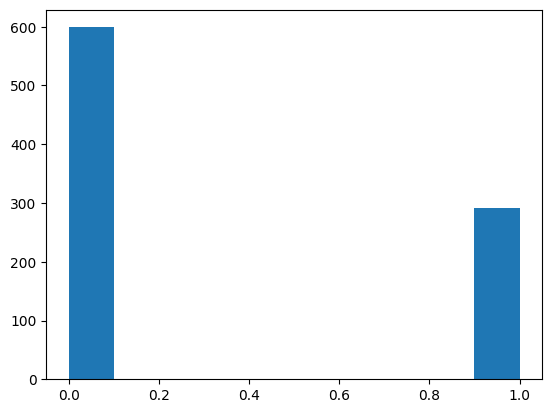

In [22]:
plt.hist(train_df['FamilyBand'])
plt.show()

In [23]:
train_df = train_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)

combine = [train_df, test_df]
train_df.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilyBand
0,3,0,1,A/5 21171,7.2500,NaN,S,0,1,1
1,1,1,2,PC 17599,71.2833,C85,C,1,5,1
2,3,1,1,STON/O2. 3101282,7.9250,NaN,S,1,4,0
3,1,1,2,113803,53.1000,C123,S,1,5,1
4,3,0,2,373450,8.0500,NaN,S,0,1,0


# Fare

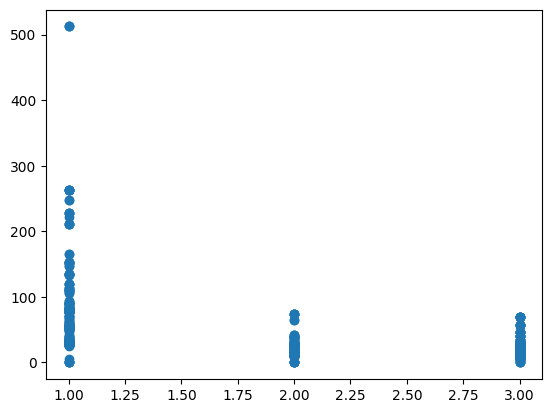

In [24]:
plt.scatter(train_df['Pclass'], train_df['Fare'])
plt.show()

In [25]:
test_df.loc[test_df.Fare.isna()]

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyBand
152,1044,3,0,3,3701,NaN,NaN,S,1,0


In [26]:
median_fares = test_df.groupby(['Pclass'])['Fare'].median()
for classname, fare in median_fares.items() :
    test_df.loc[(test_df.Fare.isna()) & (test_df.Pclass == classname), 'Fare'] = fare
test_df.loc[test_df['PassengerId'] == 1044]

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilyBand
152,1044,3,0,3,3701,7.8958,NaN,S,1,0


In [27]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand']).mean()

C:\Users\User\AppData\Local\Temp\ipykernel_88556\3998042100.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand']).mean()


,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [28]:
def band_fares(x) :
    if x <= 7.91 : return 0
    if x <= 14.454 : return 1
    if x <= 31 : return 2
    return 3

for dataset in combine :
    dataset['Fare'] = dataset['Fare'].apply(band_fares)

train_df.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilyBand,FareBand
0,3,0,1,A/5 21171,0,NaN,S,0,1,1,"(-0.001, 7.91]"
1,1,1,2,PC 17599,3,C85,C,1,5,1,"(31.0, 512.329]"
2,3,1,1,STON/O2. 3101282,1,NaN,S,1,4,0,"(7.91, 14.454]"
3,1,1,2,113803,3,C123,S,1,5,1,"(31.0, 512.329]"
4,3,0,2,373450,1,NaN,S,0,1,0,"(7.91, 14.454]"


In [29]:
train_df = train_df.drop(['FareBand'], axis = 1)
combine = [train_df, test_df]

In [30]:
train_df.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilyBand
0,3,0,1,A/5 21171,0,NaN,S,0,1,1
1,1,1,2,PC 17599,3,C85,C,1,5,1
2,3,1,1,STON/O2. 3101282,1,NaN,S,1,4,0
3,1,1,2,113803,3,C123,S,1,5,1
4,3,0,2,373450,1,NaN,S,0,1,0


# Embarked

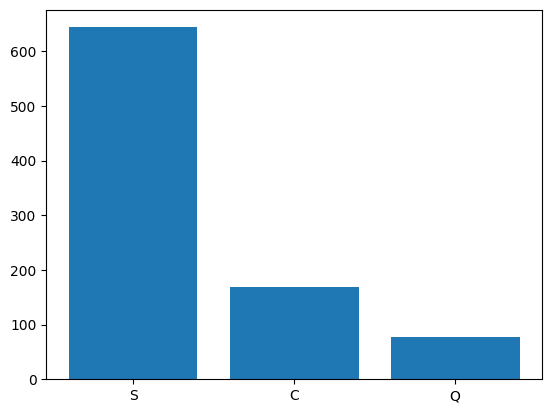

In [31]:
value_counts = train_df['Embarked'].value_counts()

# Plotting the bar plot
plt.bar(value_counts.index, value_counts.values)
plt.show()

In [32]:
for dataset in combine :
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

train_df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [33]:
embarked_set = {'S' : 0, 'Q' : 1, 'C' : 2}

for dataset in combine :
    dataset['Embarked'] = dataset['Embarked'].apply(lambda x : embarked_set[x])

train_df.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilyBand
0,3,0,1,A/5 21171,0,NaN,0,0,1,1
1,1,1,2,PC 17599,3,C85,2,1,5,1
2,3,1,1,STON/O2. 3101282,1,NaN,0,1,4,0
3,1,1,2,113803,3,C123,0,1,5,1
4,3,0,2,373450,1,NaN,0,0,1,0


# Cabin

In [34]:
def cabin_specified(x) :
    if pd.isna(x) : return 0
    return 1

In [35]:
for dataset in combine :
    dataset['Cabin'] = dataset['Cabin'].apply(cabin_specified)

train_df.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilyBand
0,3,0,1,A/5 21171,0,0,0,0,1,1
1,1,1,2,PC 17599,3,1,2,1,5,1
2,3,1,1,STON/O2. 3101282,1,0,0,1,4,0
3,1,1,2,113803,3,1,0,1,5,1
4,3,0,2,373450,1,0,0,0,1,0


In [36]:
train_df.groupby(['Cabin'])['Survived'].mean()

Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

# Ticket

In [37]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

combine = [train_df, test_df]
train_df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilyBand
0,3,0,1,0,0,0,0,1,1
1,1,1,2,3,1,2,1,5,1
2,3,1,1,1,0,0,1,4,0
3,1,1,2,3,1,0,1,5,1
4,3,0,2,1,0,0,0,1,0


# Pclass And Age

In [55]:
for dataset in combine :
    dataset['AgeClass'] = dataset['Pclass'] *  dataset['Age']

train_df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilyBand,AgeClass
0,3,0,1,0,0,0,0,1,1,3
1,1,1,2,3,1,2,1,5,1,2
2,3,1,1,1,0,0,1,4,0,3
3,1,1,2,3,1,0,1,5,1,2
4,3,0,2,1,0,0,0,1,0,6


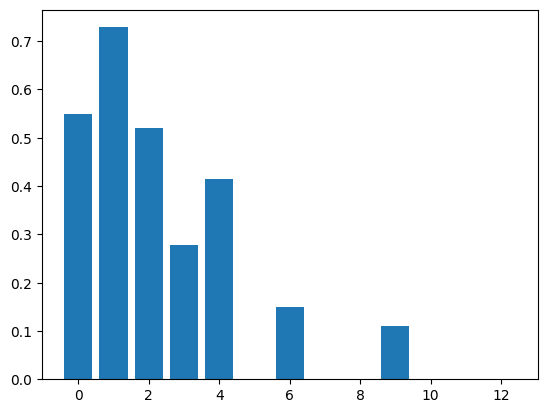

In [56]:
x = train_df.groupby(['AgeClass'], as_index=False)['Survived'].mean()
plt.bar(x['AgeClass'], x['Survived'])
plt.show()

# Finalizing Datasets

In [57]:
train_df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilyBand,AgeClass
0,3,0,1,0,0,0,0,1,1,3
1,1,1,2,3,1,2,1,5,1,2
2,3,1,1,1,0,0,1,4,0,3
3,1,1,2,3,1,0,1,5,1,2
4,3,0,2,1,0,0,0,1,0,6


In [58]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilyBand,AgeClass
0,892,3,0,2,0,0,1,1,0,6
1,893,3,1,2,0,0,0,5,1,6
2,894,2,0,3,1,0,1,1,0,6
3,895,3,0,1,1,0,0,1,0,3
4,896,3,1,1,1,0,0,5,1,3


In [59]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis = 1)

X_train.shape, y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [85]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4)
random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

84.18

In [86]:
output = pd.DataFrame({
    'PassengerId': test_df.PassengerId, 
    'Survived': Y_pred})

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
